## Model performance comparison with different features
The features as used in the paper are used as "standard" set of features. Additionaly tested features are:
- date and hour
- wind direction

All features are tested with a local model and perform roughly the same.

In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

import pm25_beijing

# database path:
DATA_PATH = "data/pollution-data/"
FEATURES_TO_USE = ["TEMP", "PRES", "DEWP", "RAIN", "WSPM", "wd", "month", "day", "hour"]
TIMESTEPS = 48 # How many steps the LSTM should take into account
NUM_REG_CLASSES = 3

2023-01-18 13:09:16.615647: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-18 13:09:16.615690: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-18 13:11:36.084136: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-18 13:11:36.084360: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-01-18 13:11:36.084390: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

In [2]:
# With this DataHandler the run function does not need to preprocess everything again
data = pm25_beijing.DataHandler(DATA_PATH, features_to_use=FEATURES_TO_USE, col_to_predict=["PM2.5"])
data.preprocess_data(minmax_features=FEATURES_TO_USE)
data.interpolate()
# The complete data as model input can not be used for sinlge stations
# data.create_model_input(TIMESTEPS, save_data=True)
_, data_labels = data.create_classes(NUM_REG_CLASSES, features=["PM2.5"])

Recognized wd (wind direction) as feature. Create columns north, east, south and west automatically.
Creating multiple classes from wd (wind direction):


100%|██████████| 12/12 [00:29<00:00,  2.46s/it]


In [3]:
# Feature comparison for single station
station = "Wanliu"
features = ["TEMP", "PRES", "DEWP", "RAIN", "WSPM"]
print(features)
lstm = pm25_beijing.create_lstm(TIMESTEPS, len(features),
                                num_output_classes=NUM_REG_CLASSES)
trained_model_std, loss_std = pm25_beijing.run_model(DATA_PATH, lstm, station=station,
                                                     features=features,
                                                     num_classes=NUM_REG_CLASSES)

features = features + ["month", "day", "hour"]
print(features)
lstm = pm25_beijing.create_lstm(TIMESTEPS, len(features),
                                num_output_classes=NUM_REG_CLASSES)
trained_model_w_date, loss_w_date = pm25_beijing.run_model(DATA_PATH, lstm, station=station,
                                                           features=features,
                                                           num_classes=NUM_REG_CLASSES)
features = ["TEMP", "PRES", "DEWP", "RAIN", "WSPM", "wd"]
print(features)
lstm = pm25_beijing.create_lstm(TIMESTEPS, len(features)+3,
                                num_output_classes=NUM_REG_CLASSES)
trained_model_w_wd, loss_w_wd = pm25_beijing.run_model(DATA_PATH, lstm, station=station,
                                                       features=features,
                                                       num_classes=NUM_REG_CLASSES)
features = features + ["month", "day", "hour"]
print(features)
lstm = pm25_beijing.create_lstm(TIMESTEPS, len(features)+3,
                                num_output_classes=NUM_REG_CLASSES)
trained_model_w_wd_date, loss_w_wd_date = pm25_beijing.run_model(
    DATA_PATH, lstm, station=station, features=features, num_classes=NUM_REG_CLASSES)

['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']


2023-01-18 13:14:31.492954: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-18 13:14:31.493010: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-18 13:14:31.493042: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (svsram): /proc/driver/nvidia/version does not exist


---------------------Preprocessing data--------------------------
-------------------Creating training data------------------------
Wanliu (1/1)
Creating model input from ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']


100%|██████████| 35016/35016 [00:23<00:00, 1469.16it/s]


---------------------Training the model--------------------------
Epoch 1/30
206/206 [==============================] - 12s 43ms/step - loss: 1.0736 - accuracy: 0.3791 - val_loss: 1.0617 - val_accuracy: 0.5117
Epoch 2/30
206/206 [==============================] - 8s 40ms/step - loss: 1.0112 - accuracy: 0.4707 - val_loss: 1.0054 - val_accuracy: 0.4957
Epoch 3/30
206/206 [==============================] - 8s 40ms/step - loss: 0.9678 - accuracy: 0.4965 - val_loss: 0.9419 - val_accuracy: 0.5515
Epoch 4/30
206/206 [==============================] - 8s 41ms/step - loss: 0.9362 - accuracy: 0.5169 - val_loss: 0.9334 - val_accuracy: 0.5425
Epoch 5/30
206/206 [==============================] - 8s 40ms/step - loss: 0.9189 - accuracy: 0.5325 - val_loss: 0.9051 - val_accuracy: 0.5576
Epoch 6/30
206/206 [==============================] - 8s 40ms/step - loss: 0.8988 - accuracy: 0.5493 - val_loss: 0.8838 - val_accuracy: 0.5720
Epoch 7/30
206/206 [==============================] - 8s 40ms/step - loss: 

100%|██████████| 35016/35016 [00:26<00:00, 1310.70it/s]


---------------------Training the model--------------------------
Epoch 1/30
206/206 [==============================] - 13s 45ms/step - loss: 1.0642 - accuracy: 0.4055 - val_loss: 1.0446 - val_accuracy: 0.4610
Epoch 2/30
206/206 [==============================] - 8s 41ms/step - loss: 0.9810 - accuracy: 0.5001 - val_loss: 0.9459 - val_accuracy: 0.5441
Epoch 3/30
206/206 [==============================] - 8s 40ms/step - loss: 0.9312 - accuracy: 0.5370 - val_loss: 0.9488 - val_accuracy: 0.5384
Epoch 4/30
206/206 [==============================] - 8s 39ms/step - loss: 0.9100 - accuracy: 0.5533 - val_loss: 0.8824 - val_accuracy: 0.5996
Epoch 5/30
206/206 [==============================] - 8s 40ms/step - loss: 0.8901 - accuracy: 0.5663 - val_loss: 0.8967 - val_accuracy: 0.5741
Epoch 6/30
206/206 [==============================] - 8s 39ms/step - loss: 0.8738 - accuracy: 0.5765 - val_loss: 0.8770 - val_accuracy: 0.5775
Epoch 7/30
206/206 [==============================] - 8s 39ms/step - loss: 

100%|██████████| 1/1 [00:02<00:00,  2.47s/it]


-------------------Creating training data------------------------
Wanliu (1/1)
Creating model input from ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'wd_N', 'wd_E', 'wd_S', 'wd_W']


100%|██████████| 35016/35016 [00:27<00:00, 1286.43it/s]


---------------------Training the model--------------------------
Epoch 1/30
206/206 [==============================] - 13s 46ms/step - loss: 1.0091 - accuracy: 0.4841 - val_loss: 0.9678 - val_accuracy: 0.5392
Epoch 2/30
206/206 [==============================] - 9s 41ms/step - loss: 0.9091 - accuracy: 0.5549 - val_loss: 0.8871 - val_accuracy: 0.5798
Epoch 3/30
206/206 [==============================] - 8s 41ms/step - loss: 0.8678 - accuracy: 0.5735 - val_loss: 0.8755 - val_accuracy: 0.5942
Epoch 4/30
206/206 [==============================] - 9s 41ms/step - loss: 0.8501 - accuracy: 0.5830 - val_loss: 0.8872 - val_accuracy: 0.5921
Epoch 5/30
206/206 [==============================] - 9s 42ms/step - loss: 0.8333 - accuracy: 0.5928 - val_loss: 0.8340 - val_accuracy: 0.6165
Epoch 6/30
206/206 [==============================] - 9s 42ms/step - loss: 0.8235 - accuracy: 0.5999 - val_loss: 0.8336 - val_accuracy: 0.6133
Epoch 7/30
206/206 [==============================] - 9s 43ms/step - loss: 

100%|██████████| 1/1 [00:02<00:00,  2.50s/it]


-------------------Creating training data------------------------
Wanliu (1/1)
Creating model input from ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'month', 'day', 'hour', 'wd_N', 'wd_E', 'wd_S', 'wd_W']


100%|██████████| 35016/35016 [00:29<00:00, 1196.41it/s]


---------------------Training the model--------------------------
Epoch 1/30
206/206 [==============================] - 13s 48ms/step - loss: 1.0012 - accuracy: 0.4672 - val_loss: 0.9751 - val_accuracy: 0.5396
Epoch 2/30
206/206 [==============================] - 9s 43ms/step - loss: 0.9244 - accuracy: 0.5339 - val_loss: 0.8973 - val_accuracy: 0.5752
Epoch 3/30
206/206 [==============================] - 9s 43ms/step - loss: 0.8848 - accuracy: 0.5628 - val_loss: 0.8690 - val_accuracy: 0.6010
Epoch 4/30
206/206 [==============================] - 9s 43ms/step - loss: 0.8548 - accuracy: 0.5844 - val_loss: 0.8481 - val_accuracy: 0.6141
Epoch 5/30
206/206 [==============================] - 9s 44ms/step - loss: 0.8337 - accuracy: 0.5953 - val_loss: 0.8003 - val_accuracy: 0.6356
Epoch 6/30
206/206 [==============================] - 9s 45ms/step - loss: 0.8220 - accuracy: 0.6007 - val_loss: 0.8579 - val_accuracy: 0.5979
Epoch 7/30
206/206 [==============================] - 9s 45ms/step - loss: 

Standard training acc: 0.655129075050354
Std + wd training acc: 0.6455334424972534
Std + date training acc: 0.6491889357566833
Std + wd + date training acc: 0.6399360299110413


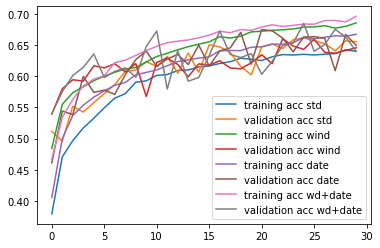

In [4]:
# Loss is not plotted for better visuality
plt.plot(loss_std.history["accuracy"], label="training acc std")
plt.plot(loss_std.history["val_accuracy"], label="validation acc std")
#plt.plot(loss_std.history["loss"], label="training loss")
#plt.plot(loss_std.history["val_loss"], label="validation loss")
plt.plot(loss_w_wd.history["accuracy"], label="training acc wind")
plt.plot(loss_w_wd.history["val_accuracy"], label="validation acc wind")
#plt.plot(loss_w_date.history["loss"], label="training loss")
#plt.plot(loss_w_date.history["val_loss"], label="validation loss")
plt.plot(loss_w_date.history["accuracy"], label="training acc date")
plt.plot(loss_w_date.history["val_accuracy"], label="validation acc date")
#plt.plot(loss_w_date.history["loss"], label="training loss")
#plt.plot(loss_w_date.history["val_loss"], label="validation loss")
plt.plot(loss_w_wd_date.history["accuracy"], label="training acc wd+date")
plt.plot(loss_w_wd_date.history["val_accuracy"], label="validation acc wd+date")
#plt.plot(loss_w_date.history["loss"], label="training loss")
#plt.plot(loss_w_date.history["val_loss"], label="validation loss")
plt.legend()
print("Standard training acc: " + str(loss_std.history["val_accuracy"][-1]))
print("Std + wd training acc: " + str(loss_w_wd.history["val_accuracy"][-1]))
print("Std + date training acc: " + str(loss_w_date.history["val_accuracy"][-1]))
print("Std + wd + date training acc: " + str(loss_w_wd_date.history["val_accuracy"][-1]))